In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sqlalchemy import create_engine

# Load Data from PostgreSQL
db_config = {
    'host': 'localhost',
    'database': 'Liberty',
    'user': 'postgres',
    'password': 'abc',
    'port': '5432'
}

connection_string = f"postgresql://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['database']}"
engine = create_engine(connection_string)

query = 'SELECT * FROM public.policydata_with_fb_cc_pc_newfea_opti;'
df = pd.read_sql(query, con=engine)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12240\4195535957.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\Admin\AppData\Local\Temp\ipykernel_12240\4195535957.py:16: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\Admin\AppData\Local\Temp\ipykernel_12240\4195535957.py:16: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\Admin\AppData\Local\Temp\ipykernel_12240\4195535957.py:16: UserWarning: Parsing dates in %d-%m-%Y format when 

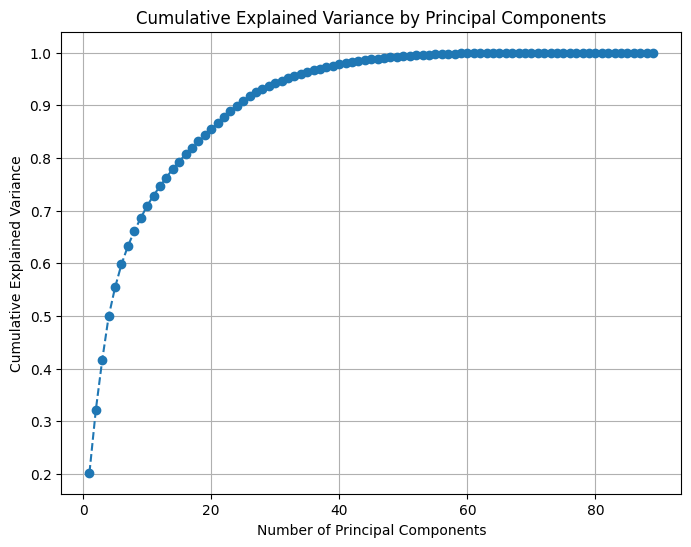

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fill missing values for both categorical and numerical columns
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].fillna('missing')
    else:
        df[column] = df[column].fillna(0)

# Identify date columns by checking for columns that could represent dates
date_columns = [col for col in df.columns if 'date' in col.lower()]
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Extract year, month, and day as separate features for all identified date columns
new_date_cols = {}
for col in date_columns:
    new_date_cols[f'{col}_YEAR'] = df[col].dt.year.fillna(0).astype(int)
    new_date_cols[f'{col}_MONTH'] = df[col].dt.month.fillna(0).astype(int)
    new_date_cols[f'{col}_DAY'] = df[col].dt.day.fillna(0).astype(int)

# Use pd.concat to add these new columns efficiently
df = pd.concat([df, pd.DataFrame(new_date_cols)], axis=1)

# Drop the original date columns after extracting year, month, and day
df = df.drop(date_columns, axis=1)

# Select numerical columns only for PCA
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove target variable if it exists in numerical columns
if 'Policy Status' in numerical_columns:
    numerical_columns.remove('Policy Status')

# Standardize the numerical data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_columns])  

# Perform PCA without specifying n_components to visualize explained variance
pca = PCA()
pca.fit(df_scaled)

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import os

# Perform PCA with n_components
n_components = 25
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(df_scaled)

# Convert PCA results to DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components + 1)])

# Save PCA Results
pca_result_path = os.path.join(os.getcwd(), "pca_result_reduced_25.csv")
pca_df.to_csv(pca_result_path, index=False)
print(f" PCA-transformed data saved: {pca_result_path}")

# Use the correct numerical feature names
original_feature_names = numerical_columns  # Ensure correct mapping

pca_components = pd.DataFrame(pca.components_, columns=original_feature_names)

# Compute total contribution of each feature
feature_importance = pca_components.abs().sum(axis=0)
feature_importance_df = pd.DataFrame(feature_importance, columns=['Total Contribution'])

# Sort feature contributions in descending order
sorted_feature_importance = feature_importance_df.sort_values(by='Total Contribution', ascending=False)

feature_importance_path = os.path.join(os.getcwd(), "pca_feature_importance_summed_25.csv")
sorted_feature_importance.to_csv(feature_importance_path, index=True)
print(f"Feature importance saved: {feature_importance_path}")

# Print Top 10 Contributing Features
print("\n Top 10 Contributing Features to PCA:")
print(sorted_feature_importance.head(10))

 PCA-transformed data saved: d:\Liberty\New set of Features (Accuracy Improvement Task)\pca_result_reduced_25.csv
Feature importance saved: d:\Liberty\New set of Features (Accuracy Improvement Task)\pca_feature_importance_summed_25.csv

 Top 10 Contributing Features to PCA:
                                 Total Contribution
manufacturer_risk_rate                     2.456549
days_gap_prev_end_to_curr_start            2.376300
CLV                                        2.355931
applicable discount with ncb               2.227806
repudiation                                2.189561
add_on_adoption                            2.170803
idv_premium_ratio                          2.164750
chain_group                                2.159460
name_similarity                            2.144827
Customer_APF                               2.138174


In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import os

# Perform PCA with n_components
n_components = 30
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(df_scaled)

# Convert PCA results to DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components + 1)])

# Save PCA Results
pca_result_path = os.path.join(os.getcwd(), "pca_result_reduced_30.csv")
pca_df.to_csv(pca_result_path, index=False)
print(f" PCA-transformed data saved: {pca_result_path}")

# Use the correct numerical feature names
original_feature_names = numerical_columns  # Ensure correct mapping

pca_components = pd.DataFrame(pca.components_, columns=original_feature_names)

# Compute total contribution of each feature
feature_importance = pca_components.abs().sum(axis=0)
feature_importance_df = pd.DataFrame(feature_importance, columns=['Total Contribution'])

# Sort feature contributions in descending order
sorted_feature_importance = feature_importance_df.sort_values(by='Total Contribution', ascending=False)

feature_importance_path = os.path.join(os.getcwd(), "pca_feature_importance_summed_30.csv")
sorted_feature_importance.to_csv(feature_importance_path, index=True)
print(f"Feature importance saved: {feature_importance_path}")

# Print Top 10 Contributing Features
print("\n Top 10 Contributing Features to PCA:")
print(sorted_feature_importance.head(10))

 PCA-transformed data saved: d:\Liberty\New set of Features (Accuracy Improvement Task)\pca_result_reduced_30.csv
Feature importance saved: d:\Liberty\New set of Features (Accuracy Improvement Task)\pca_feature_importance_summed_30.csv

 Top 10 Contributing Features to PCA:
                                 Total Contribution
chain_group                                3.558210
current year ncb (amount)                  3.236002
manufacturer_risk_rate                     3.137031
applicable discount with ncb               2.967127
previous_year_premium_ratio                2.770457
days_gap_prev_end_to_curr_start            2.734860
CLV                                        2.702255
ncb % previous year                        2.662932
null_count                                 2.591538
lag_1_ncb                                  2.474167


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sqlalchemy import create_engine

# Load Data from PostgreSQL
db_config = {
    'host': 'localhost',
    'database': 'Liberty',
    'user': 'postgres',
    'password': 'abc',
    'port': '5432'
}

connection_string = f"postgresql://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['database']}"
engine = create_engine(connection_string)

query = 'SELECT * FROM public.policydata_with_fb_cc_pc_newfea_opti;'
df = pd.read_sql(query, con=engine)

C:\Users\Admin\AppData\Local\Temp\ipykernel_24588\1663816251.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\Admin\AppData\Local\Temp\ipykernel_24588\1663816251.py:16: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\Admin\AppData\Local\Temp\ipykernel_24588\1663816251.py:16: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\Admin\AppData\Local\Temp\ipykernel_24588\1663816251.py:16: UserWarning: Parsing dates in %d-%m-%Y format when 

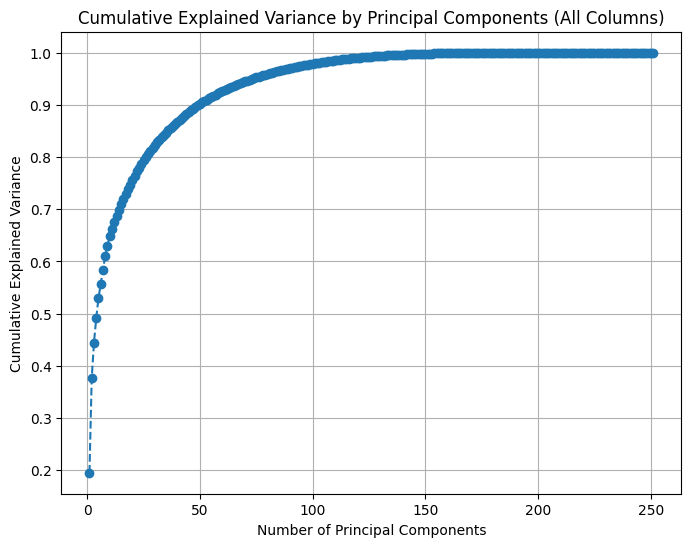

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fill missing values
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].fillna('missing')
    else:
        df[column] = df[column].fillna(0)

# Identify date columns
date_columns = [col for col in df.columns if 'date' in col.lower()]
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Extract year, month, and day
new_date_cols = {}
for col in date_columns:
    new_date_cols[f'{col}_YEAR'] = df[col].dt.year.fillna(0).astype(int)
    new_date_cols[f'{col}_MONTH'] = df[col].dt.month.fillna(0).astype(int)
    new_date_cols[f'{col}_DAY'] = df[col].dt.day.fillna(0).astype(int)

# Add new date columns and drop original date columns
df = pd.concat([df, pd.DataFrame(new_date_cols)], axis=1)
df = df.drop(date_columns, axis=1)

# Separate target if exists
target_column = 'Policy Status'
if target_column in df.columns:
    df = df.drop(columns=[target_column])

# Label encode all categorical columns
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

# Standardize all columns (now all are numeric)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Perform PCA
pca = PCA()
pca.fit(df_scaled)

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components (All Columns)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [3]:
import os

# Perform PCA with n_components
n_components = 50
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(df_scaled)

# Convert PCA results to DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components + 1)])

# Save PCA results
pca_result_path = os.path.join(os.getcwd(), "pca_result_reduced_50.csv")
pca_df.to_csv(pca_result_path, index=False)
print(f"PCA-transformed data saved: {pca_result_path}")

# Use all feature names (since all columns were used)
original_feature_names = df.columns.tolist()

# Get PCA components as DataFrame
pca_components = pd.DataFrame(pca.components_, columns=original_feature_names)

# Compute total contribution of each feature across all components
feature_importance = pca_components.abs().sum(axis=0)
feature_importance_df = pd.DataFrame(feature_importance, columns=['Total Contribution'])

# Sort feature contributions in descending order
sorted_feature_importance = feature_importance_df.sort_values(by='Total Contribution', ascending=False)

# Save feature importance results
feature_importance_path = os.path.join(os.getcwd(), "pca_feature_importance_summed_50.csv")
sorted_feature_importance.to_csv(feature_importance_path, index=True)
print(f"Feature importance saved: {feature_importance_path}")

# Print Top 10 Contributing Features
print("\nTop 10 Contributing Features to PCA:")
print(sorted_feature_importance.head(10))

PCA-transformed data saved: d:\Liberty\New set of Features (Accuracy Improvement Task)\pca_result_reduced_50.csv
Feature importance saved: d:\Liberty\New set of Features (Accuracy Improvement Task)\pca_feature_importance_summed_50.csv

Top 10 Contributing Features to PCA:
                                                 Total Contribution
Cleaned Zone 2                                             3.679917
name_similarity                                            3.674389
add on eligibilty (5th & 6th renewals with ncb)            3.557510
rto location                                               3.548602
days_gap_prev_end_to_curr_start                            3.539000
fuel type                                                  3.517180
rto_risk_factor                                            3.406019
state_risk_score                                           3.329574
enginenumber                                               3.325192
Cleaned Engine Number                          

In [4]:
import os

# Perform PCA with n_components
n_components = 40
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(df_scaled)

# Convert PCA results to DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components + 1)])

# Save PCA results
pca_result_path = os.path.join(os.getcwd(), "pca_result_reduced_40.csv")
pca_df.to_csv(pca_result_path, index=False)
print(f"PCA-transformed data saved: {pca_result_path}")

# Use all feature names (since all columns were used)
original_feature_names = df.columns.tolist()

# Get PCA components as DataFrame
pca_components = pd.DataFrame(pca.components_, columns=original_feature_names)

# Compute total contribution of each feature across all components
feature_importance = pca_components.abs().sum(axis=0)
feature_importance_df = pd.DataFrame(feature_importance, columns=['Total Contribution'])

# Sort feature contributions in descending order
sorted_feature_importance = feature_importance_df.sort_values(by='Total Contribution', ascending=False)

# Save feature importance results
feature_importance_path = os.path.join(os.getcwd(), "pca_feature_importance_summed_40.csv")
sorted_feature_importance.to_csv(feature_importance_path, index=True)
print(f"Feature importance saved: {feature_importance_path}")

# Print Top 10 Contributing Features
print("\nTop 10 Contributing Features to PCA:")
print(sorted_feature_importance.head(10))

PCA-transformed data saved: d:\Liberty\New set of Features (Accuracy Improvement Task)\pca_result_reduced_40.csv
Feature importance saved: d:\Liberty\New set of Features (Accuracy Improvement Task)\pca_feature_importance_summed_40.csv

Top 10 Contributing Features to PCA:
                              Total Contribution
enginenumber                            3.074037
Cleaned Engine Number                   3.071716
Cleaned Zone 2                          2.964382
applicable discount with ncb            2.801558
CLV                                     2.801533
old policy no                           2.763879
ncb % previous year                     2.763804
last year ncb                           2.762471
hyundai discount status                 2.750174
idv_premium_ratio                       2.741251
